# Neural Networks 

This assignment contains three main parts:
1. A Single Neuron
    - Logistic Regression Unit
    - Linear Regression Unit
2. Multi-Layer Perceptron with One Hidden Layer
    - Linear Regression Task 
    - Hyperparameter Tuning with GridsearchCV
3. Deep Neural Network for MNIST Handwritten Digit Classification
    - Hyperparameter Tuning with Keras Tuner    -

---



## Part 1:✏️  A Single Neuron

### 1.1 Logistic Regression Unit

In this section, a logistic regression unit is implemented using a single neuron for a binary classification task on the Breast Cancer dataset.


#### Data Loading, Splitting And Standardization

In [1]:
#Cell_1

# Importing necessary libraries
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_openml
from sklearn.metrics import mean_squared_error, mean_absolute_error,  r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import random

# Set seeds for reproducibility
def set_seed(seed=42):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    random.seed(seed)

In [2]:
# Load Breast Cancer dataset
cancer_data = load_breast_cancer()
X_cancer, y_cancer = cancer_data.data, cancer_data.target

# Split data
X_train_cancer, X_test_cancer, y_train_cancer, y_test_cancer = train_test_split(X_cancer, y_cancer, stratify=y_cancer, test_size=0.2, random_state=42)

# Data Standardization
scaler = StandardScaler()
X_train_cancer = scaler.fit_transform(X_train_cancer)
X_test_cancer = scaler.transform(X_test_cancer)

#### Build The Model Using tensorflow.keras
- The input layer is defined with the shape of the training data, which consists of 30 features in the Breast Cancer dataset
- A single neuron with a sigmoid activation function is used in the Dense layer
- The optimizer used is 'SGD' (Stochastic Gradient Descent) with batch size 32. It is in this case a mini-batch Stochastic Gradient Descent
- The early stopping callback is configured to monitor the validation loss and stop training when it doesn't improve by at least 0.001 for 10 consecutive epochs
- The model is trained for up to 100 epochs with a batch size of 32
- The model's accuracy on the test set is printed
- A classification report and confusion matrix are generated and visualized
- The learning curve shows the training and validation loss over epochs


Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.6356 - loss: 0.7050 - val_accuracy: 0.7609 - val_loss: 0.5329
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8617 - loss: 0.4134 - val_accuracy: 0.8478 - val_loss: 0.4072
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9065 - loss: 0.3164 - val_accuracy: 0.8478 - val_loss: 0.3395
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9293 - loss: 0.2647 - val_accuracy: 0.8478 - val_loss: 0.2953
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9403 - loss: 0.2318 - val_accuracy: 0.9130 - val_loss: 0.2637
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9427 - loss: 0.2085 - val_accuracy: 0.9130 - val_loss: 0.2398
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9526 - loss: 0.1909 - val_accuracy: 0.9348 - val_loss: 0.2211
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9576 - loss: 0.1770 - val_accuracy: 0.9565 - 

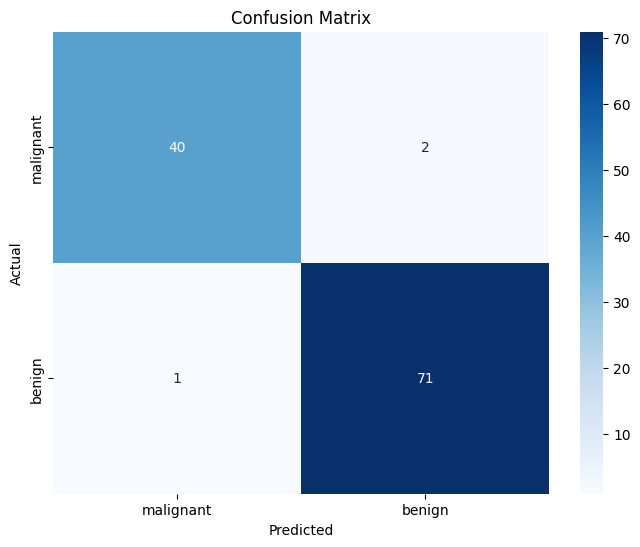

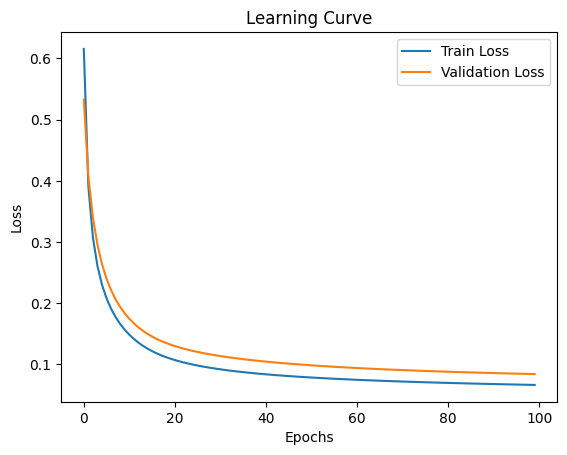

In [3]:
#Cell_2

# Set seed value
set_seed(42)

#Build Logistic Regression Unit using TensorFlow
logistic_model = Sequential([
    layers.Input((X_train_cancer.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer
logistic_model.compile(optimizer=SGD(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to avoid overtfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1, restore_best_weights=True)

# Train the model
history = logistic_model.fit(X_train_cancer, y_train_cancer, epochs=100, validation_split=0.1, batch_size=32, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = logistic_model.evaluate(X_test_cancer, y_test_cancer, verbose=1)
print(f'TensorFlow Logistic Regression Accuracy: {accuracy:.2f}')

# Generate the classification report
y_pred_cancer = logistic_model.predict(X_test_cancer)
y_pred_cancer = (y_pred_cancer > 0.5).astype(int)
print(classification_report(y_test_cancer, y_pred_cancer))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_cancer, y_pred_cancer)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the learning curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()


##### 1- ✏️ **In Cell_2:**
   * Change the `batch_size` from 32 to 1, then run the cell. How does this change affect the learning curve and the training process? What is the name of the optimizer in this case?

Epoch 1/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9060 - loss: 0.2625 - val_accuracy: 0.9783 - val_loss: 0.1115
Epoch 2/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 769us/step - accuracy: 0.9817 - loss: 0.0870 - val_accuracy: 0.9783 - val_loss: 0.0881
Epoch 3/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.9826 - loss: 0.0730 - val_accuracy: 0.9783 - val_loss: 0.0804
Epoch 4/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 704us/step - accuracy: 0.9826 - loss: 0.0661 - val_accuracy: 0.9783 - val_loss: 0.0764
Epoch 5/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 779us/step - accuracy: 0.9826 - loss: 0.0618 - val_accuracy: 0.9783 - val_loss: 0.0741
Epoch 6/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.9886 - loss: 0.0586 - val_accuracy: 0.9783 - val_loss: 0.0726
Epoch 7/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 794us/step - accuracy: 0.9886 - loss: 0.0561 - val_accuracy: 0.9783 - val_loss: 0.0717
Epoch 8/100
409/409 ━━━━━━━━━━━━━━━━━━━━ 0s 968us/step - accuracy: 0.9926 - loss: 0.0

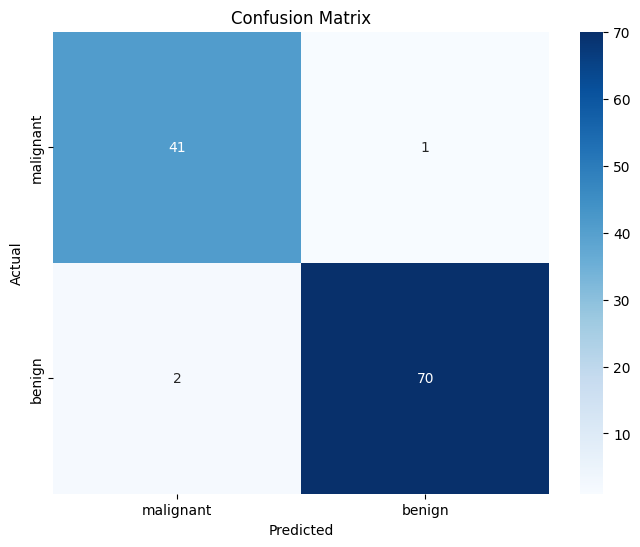

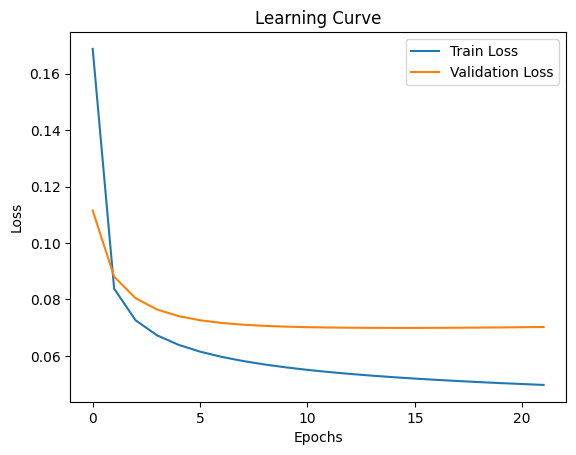

In [4]:
# Answer question 1 here
# TODO: Implement
#Cell_2

# Set seed value
set_seed(42)

#Build Logistic Regression Unit using TensorFlow
logistic_model = Sequential([
    layers.Input((X_train_cancer.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer
logistic_model.compile(optimizer=SGD(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to avoid overtfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1, restore_best_weights=True)

# Train the model
history = logistic_model.fit(X_train_cancer, y_train_cancer, epochs=100, validation_split=0.1, batch_size=1, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = logistic_model.evaluate(X_test_cancer, y_test_cancer, verbose=1)
print(f'TensorFlow Logistic Regression Accuracy: {accuracy:.2f}')

# Generate the classification report
y_pred_cancer = logistic_model.predict(X_test_cancer)
y_pred_cancer = (y_pred_cancer > 0.5).astype(int)
print(classification_report(y_test_cancer, y_pred_cancer))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_cancer, y_pred_cancer)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the learning curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()


##### 2- ✏️ **In Cell_2:**
   * Change the `batch_size` from 1 to 409, then run the cell. How does this change affect the learning curve and the training process? What is the name of the optimizer in this case?

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step - accuracy: 0.4645 - loss: 0.8512 - val_accuracy: 0.3043 - val_loss: 0.8821
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.5232 - loss: 0.7860 - val_accuracy: 0.4130 - val_loss: 0.8268
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.5941 - loss: 0.7309 - val_accuracy: 0.5000 - val_loss: 0.7794
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - accuracy: 0.6626 - loss: 0.6841 - val_accuracy: 0.5217 - val_loss: 0.7387
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7017 - loss: 0.6443 - val_accuracy: 0.5217 - val_loss: 0.7034
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - accuracy: 0.7188 - loss: 0.6100 - val_accuracy: 0.5870 - val_loss: 0.6727
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.7359 - loss: 0.5803 - val_accuracy: 0.6304 - val_loss: 0.6456
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.7702 - loss: 0.5543 - val_accuracy: 0.6739 - val_loss

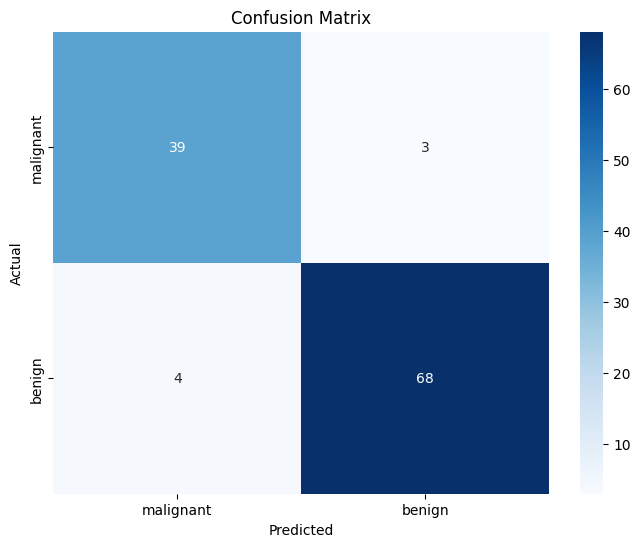

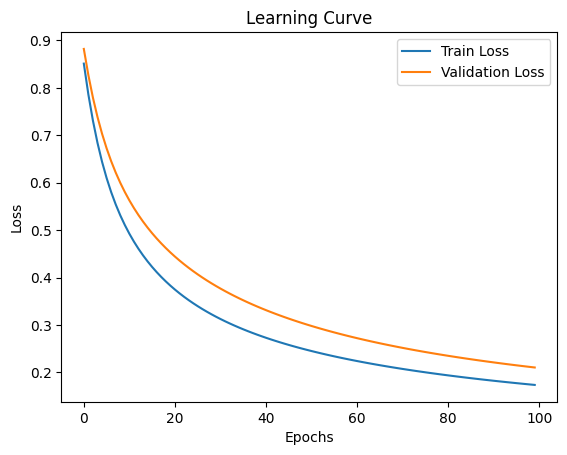

In [5]:
# Answer question 2 here
# TODO: Implement
#Cell_2

# Set seed value
set_seed(42)

#Build Logistic Regression Unit using TensorFlow
logistic_model = Sequential([
    layers.Input((X_train_cancer.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer
logistic_model.compile(optimizer=SGD(learning_rate=0.03), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to avoid overtfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1, restore_best_weights=True)

# Train the model
history = logistic_model.fit(X_train_cancer, y_train_cancer, epochs=100, validation_split=0.1, batch_size=409, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = logistic_model.evaluate(X_test_cancer, y_test_cancer, verbose=1)
print(f'TensorFlow Logistic Regression Accuracy: {accuracy:.2f}')

# Generate the classification report
y_pred_cancer = logistic_model.predict(X_test_cancer)
y_pred_cancer = (y_pred_cancer > 0.5).astype(int)
print(classification_report(y_test_cancer, y_pred_cancer))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_cancer, y_pred_cancer)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the learning curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()


##### 3- ✏️ **In Cell_2:**
   * Return the `batch_size` to it original given value 32, then change the  `learning_rate` to 10.03 and run the cell. How does this change affect the learning curve and the training process? 

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8569 - loss: 0.4651 - val_accuracy: 0.9783 - val_loss: 0.0764
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9705 - loss: 0.1599 - val_accuracy: 0.9783 - val_loss: 0.0513
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9739 - loss: 0.1284 - val_accuracy: 1.0000 - val_loss: 0.0247
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9821 - loss: 0.1020 - val_accuracy: 0.9783 - val_loss: 0.0534
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9778 - loss: 0.0890 - val_accuracy: 0.9565 - val_loss: 0.0953
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9897 - loss: 0.0587 - val_accuracy: 0.9783 - val_loss: 0.0604
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9821 - loss: 0.0771 - val_accuracy: 0.9783 - val_loss: 0.0501
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9784 - loss: 0.0798 - val_accuracy: 0.9565 - 

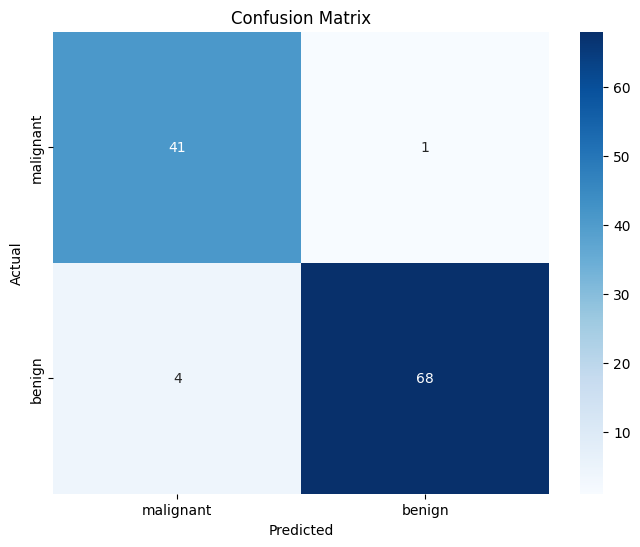

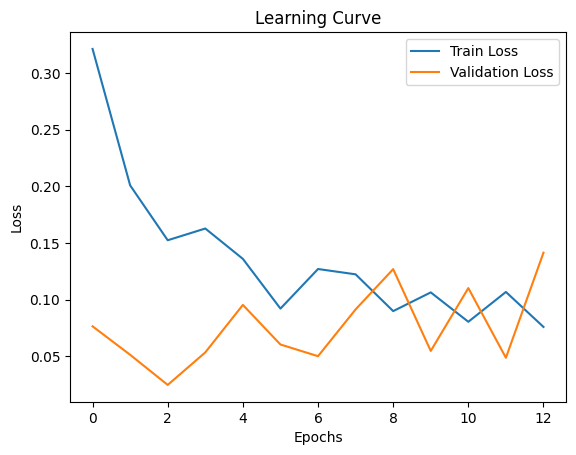

In [6]:
# Answer question 3 here
# TODO: Implement
#Cell_2

# Set seed value
set_seed(42)

#Build Logistic Regression Unit using TensorFlow
logistic_model = Sequential([
    layers.Input((X_train_cancer.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer
logistic_model.compile(optimizer=SGD(learning_rate=10.03), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to avoid overtfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1, restore_best_weights=True)

# Train the model
history = logistic_model.fit(X_train_cancer, y_train_cancer, epochs=100, validation_split=0.1, batch_size=32, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = logistic_model.evaluate(X_test_cancer, y_test_cancer, verbose=1)
print(f'TensorFlow Logistic Regression Accuracy: {accuracy:.2f}')

# Generate the classification report
y_pred_cancer = logistic_model.predict(X_test_cancer)
y_pred_cancer = (y_pred_cancer > 0.5).astype(int)
print(classification_report(y_test_cancer, y_pred_cancer))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_cancer, y_pred_cancer)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the learning curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()


##### 4- ✏️ **In Cell_2:**
   * Change the  `learning_rate` to 0.0003 and run the cell. How does this change affect the learning curve and the training process? 

Epoch 1/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4753 - loss: 0.8435 - val_accuracy: 0.2391 - val_loss: 0.9382
Epoch 2/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.4810 - loss: 0.8350 - val_accuracy: 0.2391 - val_loss: 0.9297
Epoch 3/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5018 - loss: 0.8268 - val_accuracy: 0.2609 - val_loss: 0.9214
Epoch 4/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5041 - loss: 0.8187 - val_accuracy: 0.2826 - val_loss: 0.9132
Epoch 5/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5080 - loss: 0.8107 - val_accuracy: 0.2826 - val_loss: 0.9052
Epoch 6/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5227 - loss: 0.8030 - val_accuracy: 0.2826 - val_loss: 0.8973
Epoch 7/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5293 - loss: 0.7953 - val_accuracy: 0.3043 - val_loss: 0.8896
Epoch 8/100
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5329 - loss: 0.7879 - val_accuracy: 0.3043 - 

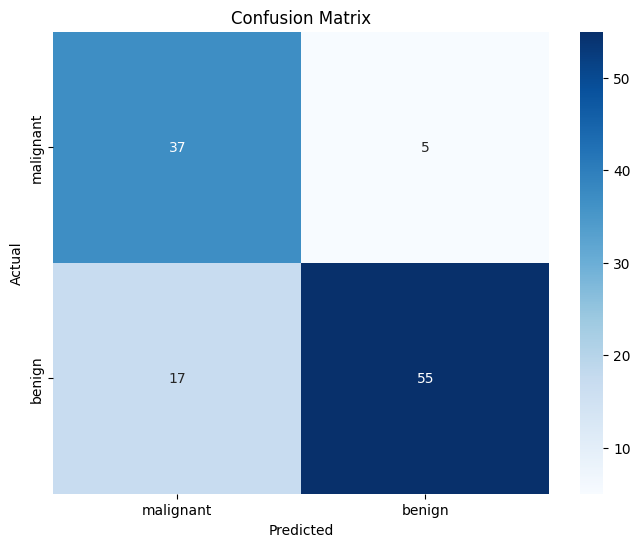

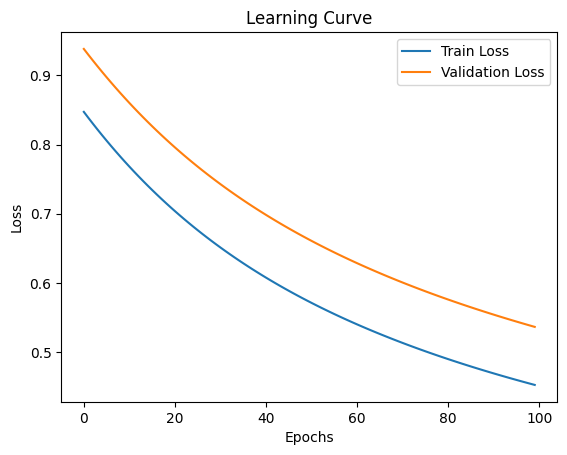

In [7]:
# Answer question 4 here
# TODO: Implement
#Cell_2

# Set seed value
set_seed(42)

#Build Logistic Regression Unit using TensorFlow
logistic_model = Sequential([
    layers.Input((X_train_cancer.shape[1],)),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with SGD optimizer
logistic_model.compile(optimizer=SGD(learning_rate=0.0003), loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping callback to avoid overtfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1, restore_best_weights=True)

# Train the model
history = logistic_model.fit(X_train_cancer, y_train_cancer, epochs=100, validation_split=0.1, batch_size=32, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss, accuracy = logistic_model.evaluate(X_test_cancer, y_test_cancer, verbose=1)
print(f'TensorFlow Logistic Regression Accuracy: {accuracy:.2f}')

# Generate the classification report
y_pred_cancer = logistic_model.predict(X_test_cancer)
y_pred_cancer = (y_pred_cancer > 0.5).astype(int)
print(classification_report(y_test_cancer, y_pred_cancer))

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_cancer, y_pred_cancer)
# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=cancer_data.target_names, yticklabels=cancer_data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Plot the learning curve
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()

### 1.2 ✏️ Linear Regression Unit

In this section, a linear regression unit is implemented using a single neuron for a regression task on the Combined Cycle Power Plant (CCPP) dataset.



#### Data Loading, Splitting, Outlier Removing, And Standardization

In [8]:
#Cell_3

# Load CCPP dataset
df = pd.read_csv("data/Folds5x2_pp.csv", sep=';')

# Function: Removing Outliers 
def remove_outliers(df):
    dfc = df.copy()
    upper_limits = dfc.quantile(0.995)
    lower_limits = dfc.quantile(0.005)
    for colname in dfc.columns:
        col = dfc[colname]
        dfc = dfc[
            ((col <= upper_limits[colname]) & (col >= lower_limits[colname]))
            | col.isna()
        ]
    return dfc

df=remove_outliers(df)
# Extract the target and the input variables
y = df.pop('PE')
X = df

# Split data
X_train_ccpp, X_test_ccpp, y_train_ccpp, y_test_ccpp = train_test_split(X, y, test_size=0.2, random_state=42)

# Data standardization
scaler = StandardScaler()
X_train_ccpp = scaler.fit_transform(X_train_ccpp)
X_test_ccpp = scaler.transform(X_test_ccpp)

#### ✏️Build The Model Using tensorflow.keras
- The input layer is defined with the shape of the training data, which consists of 4 features in the CCPP dataset.
- A single neuron with a linear activation function is used in the Dense layer.
- The optimizer used is 'SGD' (Stochastic Gradient Descent) with a batch size of 128. It is in this case a mini-batch Stochastic Gradient Descent.
- The early stopping callback is configured to monitor the validation loss and stop training when it doesn't improve by at least 0.001 for 10 consecutive epochs.
- The model is trained for up to 100 epochs with a batch size of 128.
- The model's mean squared error (MSE), Mean Absolute Error and R-squared on the test set is printed.
- The learning curve shows the training and validation loss over epochs.


Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 134715.1094 - mse: 134715.1094 - val_loss: 25397.2637 - val_mse: 25397.2637
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 16480.2969 - mse: 16480.2969 - val_loss: 3140.4595 - val_mse: 3140.4595
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2037.6056 - mse: 2037.6056 - val_loss: 409.1092 - val_mse: 409.1092
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 272.4504 - mse: 272.4504 - val_loss: 71.7355 - val_mse: 71.7355
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 56.0123 - mse: 56.0123 - val_loss: 28.9626 - val_mse: 28.9626
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 28.7177 - mse: 28.7177 - val_loss: 22.8096 - val_mse: 22.8096
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 24.5961 - mse: 24.5961 - val_loss: 21.3884 - val_mse: 21.3884
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 23.4213 - mse: 23.4213 - val_loss: 20.6949 - val_mse: 20.6949


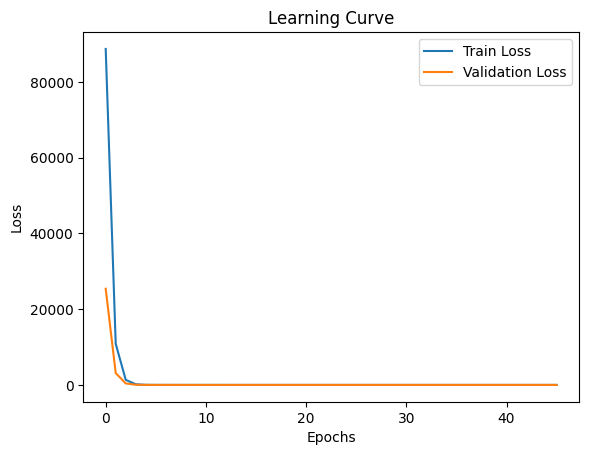

In [20]:
#Cell_4

# Set seed value
set_seed(42)

# Build Linear Regression Model using TensorFlow
#  ✏️TODO: Implement
linear_model = Sequential([
    layers.Input((X_train_ccpp.shape[1],)),
    layers.Dense(1, activation='linear')
])


# Compile the model with SGD optimizer
#  ✏️TODO: Implement
linear_model.compile(optimizer=SGD(), loss='mean_squared_error', metrics=['mse'])


# Early stopping callback to avoid overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1, restore_best_weights=True)

# Train the model
history = linear_model.fit(X_train_ccpp, y_train_ccpp, epochs=100, validation_split=0.1, batch_size=128, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss, mse = linear_model.evaluate(X_test_ccpp, y_test_ccpp, verbose=1)
print(f'TensorFlow Linear Regression Mean Squared Error: {mse:.2f}')

# Predict values
y_pred_ccpp = linear_model.predict(X_test_ccpp)

# Calculate and print Mean Absolute Error, Root Mean Squared Error, and R-squared
mae_value = mean_absolute_error(y_test_ccpp, y_pred_ccpp)
rmse_value = np.sqrt(mse)
r2_value = r2_score(y_test_ccpp, y_pred_ccpp)
print(f'Mean Absolute Error: {mae_value:.2f}')
print(f'Root Mean Squared Error: {rmse_value:.2f}')
print(f'R-squared: {r2_value:.2f}')


# Plot the learning curve
#  ✏️TODO: Implement
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()



## Part 2: Multi-Layer Perceptron with One Hidden Layer
### 2.1  ✏️Linear Regression Task
In this section, a linear regression unit with one hidden layer is implemented for a regression task on the Combined Cycle Power Plant (CCPP) dataset.

#### Build The Model Using tensorflow.keras
- The input layer is defined with the shape of the training data, which consists of 4 features in the CCPP dataset.
- A hidden layer with 64 neurons and ReLU activation function is added.
- A single neuron with a linear activation function is used in the Dense layer as the output layer
- The optimizer used is 'SGD' (Stochastic Gradient Descent) with a learning rate of 0.001 and a batch size of 128, which is a mini-batch Stochastic Gradient Descent.
- The early stopping callback is configured to monitor the validation loss and stop training when it doesn't improve by at least 0.001 for 10 consecutive epochs.
- The model is trained for up to 100 epochs with a batch size of 128.
- The model's mean squared error (MSE), root mean squared error (RMSE), and R-squared on the test set are printed.
- The learning curve shows the training and validation loss over epochs.

Epoch 1/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 62827.3516 - mse: 62827.3516 - val_loss: 850.5000 - val_mse: 850.5000
Epoch 2/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 536.4866 - mse: 536.4866 - val_loss: 242.4187 - val_mse: 242.4187
Epoch 3/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 284.6142 - mse: 284.6142 - val_loss: 84.0089 - val_mse: 84.0089
Epoch 4/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 102.8451 - mse: 102.8451 - val_loss: 86.3274 - val_mse: 86.3274
Epoch 5/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 96.9572 - mse: 96.9572 - val_loss: 61.4060 - val_mse: 61.4060
Epoch 6/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 68.0951 - mse: 68.0951 - val_loss: 36.5550 - val_mse: 36.5550
Epoch 7/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 46.7863 - mse: 46.7863 - val_loss: 25.5606 - val_mse: 25.5606
Epoch 8/100
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 36.2159 - mse: 36.2159 - val_loss: 21.1524 - val_mse: 21.1524
Epoch 9/100
52/5

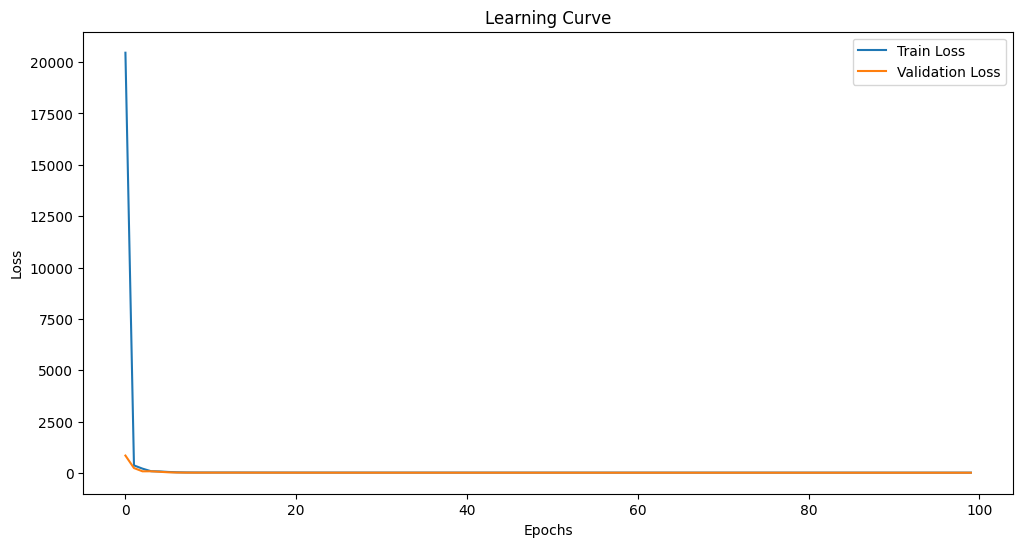

In [13]:
#Cell_5
# Set seed value
set_seed(42)

# Build Linear Regression Model using TensorFlow
linear_model = Sequential([
    layers.Input((X_train_ccpp.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Compile the model with SGD optimizer
linear_model.compile(optimizer=SGD(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

# Early stopping callback to avoid overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1,restore_best_weights=True)

# Train the model
history = linear_model.fit(X_train_ccpp, y_train_ccpp, epochs=100, validation_split=0.1, batch_size=128, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss, mse = linear_model.evaluate(X_test_ccpp, y_test_ccpp, verbose=1)
print(f'TensorFlow Linear Regression Mean Squared Error: {mse:.2f}')

# Predict values
y_pred_ccpp = linear_model.predict(X_test_ccpp)

# Calculate and print Mean Absolute Error, Root Mean Squared Error, and R-squared
mae_value = mean_absolute_error(y_test_ccpp, y_pred_ccpp)
rmse_value = np.sqrt(mse)
r2_value = r2_score(y_test_ccpp, y_pred_ccpp)
print(f'Mean Absolute Error: {mae_value:.2f}')
print(f'Root Mean Squared Error: {rmse_value:.2f}')
print(f'R-squared: {r2_value:.2f}')


# Plot the learning curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()


 ✏️1- Compare between the results of Cell_4 and Cell_5. 

In [ ]:
# Answer question 1 here
# TODO: Implement

##### 2- ✏️ **In Cell_5:**
   * Change the number of neurons of the hidden layer from 64 to 200 and the number of epochs fromm 100 to 250 and run the cell. Interpret your results.

Epoch 1/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 63703.7539 - mse: 63703.7539 - val_loss: 904.7308 - val_mse: 904.7308
Epoch 2/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 512.7987 - mse: 512.7987 - val_loss: 226.0322 - val_mse: 226.0322
Epoch 3/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 263.9798 - mse: 263.9798 - val_loss: 82.6968 - val_mse: 82.6968
Epoch 4/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 96.1522 - mse: 96.1522 - val_loss: 72.0891 - val_mse: 72.0891
Epoch 5/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 85.6100 - mse: 85.6100 - val_loss: 61.4823 - val_mse: 61.4823
Epoch 6/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 67.1531 - mse: 67.1531 - val_loss: 36.0840 - val_mse: 36.0840
Epoch 7/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 45.2379 - mse: 45.2379 - val_loss: 24.6915 - val_mse: 24.6915
Epoch 8/200
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 35.5465 - mse: 35.5465 - val_loss: 21.6644 - val_mse: 21.6644
Epoch 9/200
52/52 

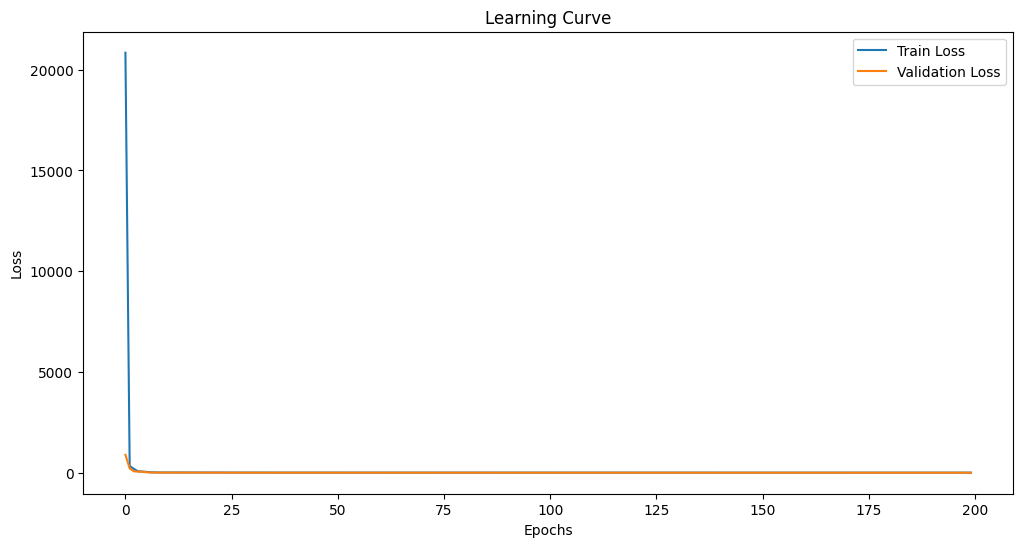

In [14]:
# Answer question 2 here
# TODO: Implement
#Cell_5
# Set seed value
set_seed(42)

# Build Linear Regression Model using TensorFlow
linear_model = Sequential([
    layers.Input((X_train_ccpp.shape[1],)),
    layers.Dense(200, activation='relu'),
    layers.Dense(1, activation='linear')
])

# Compile the model with SGD optimizer
linear_model.compile(optimizer=SGD(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

# Early stopping callback to avoid overfitting
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, verbose=1,restore_best_weights=True)

# Train the model
history = linear_model.fit(X_train_ccpp, y_train_ccpp, epochs=200, validation_split=0.1, batch_size=128, verbose=1, callbacks=[early_stopping])

# Evaluate the model
loss, mse = linear_model.evaluate(X_test_ccpp, y_test_ccpp, verbose=1)
print(f'TensorFlow Linear Regression Mean Squared Error: {mse:.2f}')

# Predict values
y_pred_ccpp = linear_model.predict(X_test_ccpp)

# Calculate and print Mean Absolute Error, Root Mean Squared Error, and R-squared
mae_value = mean_absolute_error(y_test_ccpp, y_pred_ccpp)
rmse_value = np.sqrt(mse)
r2_value = r2_score(y_test_ccpp, y_pred_ccpp)
print(f'Mean Absolute Error: {mae_value:.2f}')
print(f'Root Mean Squared Error: {rmse_value:.2f}')
print(f'R-squared: {r2_value:.2f}')


# Plot the learning curve
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()


##### How to optimize a MLP implemented using tensorflow.keras using Gridsearchcv from scikit-learn?

It takes about more than 6 minutes

                                               params  mean_test_score  \
0   {'epochs': 100, 'model__learning_rate': 0.0001...         0.932629   
1   {'epochs': 100, 'model__learning_rate': 0.0001...         0.933378   
2   {'epochs': 100, 'model__learning_rate': 0.0001...         0.933297   
3   {'epochs': 100, 'model__learning_rate': 0.001,...         0.915437   
4   {'epochs': 100, 'model__learning_rate': 0.001,...         0.914535   
5   {'epochs': 100, 'model__learning_rate': 0.001,...         0.915447   
6   {'epochs': 250, 'model__learning_rate': 0.0001...         0.934734   
7   {'epochs': 250, 'model__learning_rate': 0.0001...         0.935431   
8   {'epochs': 250, 'model__learning_rate': 0.0001...         0.935429   
9   {'epochs': 250, 'model__learning_rate': 0.001,...         0.914981   
10  {'epochs': 250, 'model__learning_rate': 0.001,...         0.916322   
11  {'epochs': 250, 'model__learning_rate': 0.001,...         0.918491   

    std_test_score  rank_test_score  

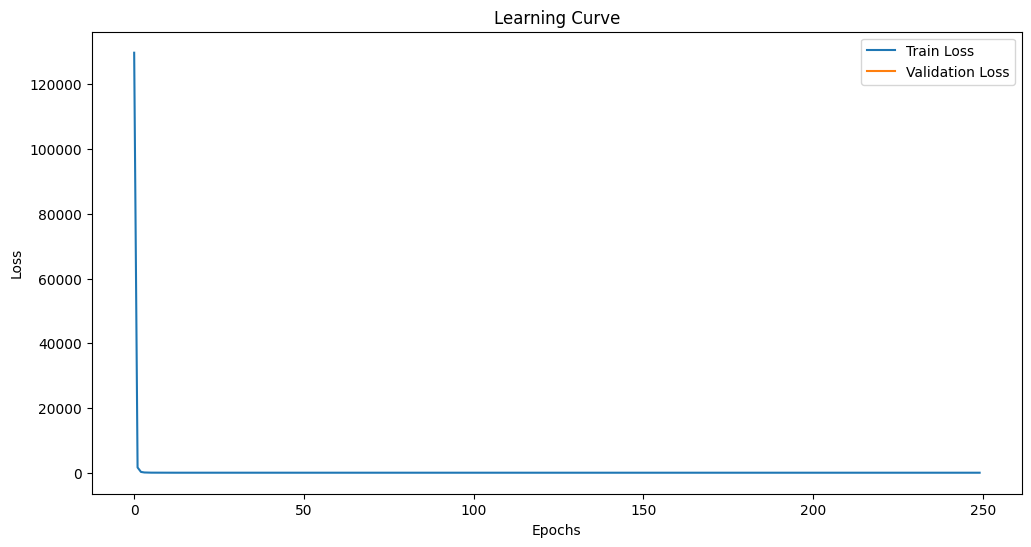

In [16]:
# You should install scikeras firstly
#   pip install scikeras 
from scikeras.wrappers import KerasRegressor

# Define a function to build the Keras model
def build_model(learning_rate=0.001, neurons=64):
    model = Sequential([
        layers.Input(shape=(X_train_ccpp.shape[1],)),
        layers.Dense(neurons, activation='relu'),
        layers.Dense(1, activation='linear')
    ])
    model.compile(optimizer=SGD(learning_rate=learning_rate), loss='mean_squared_error', metrics=['mse'])
    return model

# Create the KerasRegressor wrapper
model = KerasRegressor(model=build_model, epochs=100, batch_size=128, verbose=0)

# Define the parameter grid
param_grid = {
    'model__learning_rate': [0.0001, 0.001],
    'model__neurons': [32, 64,  200],
    'epochs': [100, 250]
    
}

# Create the GridSearchCV object
grid = GridSearchCV(estimator=model, param_grid=param_grid, cv=3)

# Fit the grid search
grid = grid.fit(X_train_ccpp, y_train_ccpp)

# Display the grid search results as a table
results = pd.DataFrame(grid.cv_results_)
results = results[['params', 'mean_test_score', 'std_test_score', 'rank_test_score']]
print(results)


# Print best parameters and score
print(f"Best: {grid.best_score_} using {grid.best_params_}")
# Retrieve the best model and its history
best_model = grid.best_estimator_.model_
history = grid.best_estimator_.history_

# Evaluate the best model
loss, mse = best_model.evaluate(X_test_ccpp, y_test_ccpp, verbose=1)
print(f'TensorFlow Linear Regression Mean Squared Error: {mse:.2f}')

# Predict values
y_pred_ccpp = best_model.predict(X_test_ccpp)

# Calculate and print Mean Absolute Error, Root Mean Squared Error, and R-squared
mae_value = mean_absolute_error(y_test_ccpp, y_pred_ccpp)
rmse_value = np.sqrt(mse)
r2_value = r2_score(y_test_ccpp, y_pred_ccpp)
print(f'Mean Absolute Error: {mae_value:.2f}')
print(f'Root Mean Squared Error: {rmse_value:.2f}')
print(f'R-squared: {r2_value:.2f}')

# Plot the learning curve
plt.figure(figsize=(12, 6))
plt.plot(history['loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()

## Part 3: Deep Neural Network for MNIST Handwritten Digits Classification

Before you start with this section, [visit the TensorFlow playground website and try to try some hyperparameters combinations](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.51885&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In this section, we aim to build a Deep Neural Network (DNN) for the classification of handwritten digits using the MNIST dataset. The model is designed to take in 28x28 pixel images as input and classify them into one of the 10 digit classes (0-9). More information about that dataset here (http://yann.lecun.com/exdb/mnist/)

#### Model Architecture
The neural network is defined as follows:

1. **Input Layer:**
   - The input layer takes in the flattened 28x28 pixel images, resulting in 784 input features.

2. **Hidden Layers:**
   - The model includes two hidden layers, each with a configurable number of neurons (`units`) and ReLU activation functions. The number of neurons in these layers is determined through hyperparameter tuning, with possible values ranging from 32 to 512 in steps of 32.

3. **Output Layer:**
   - The output layer is a Dense layer with 10 neurons, corresponding to the 10 digit classes. It uses the softmax activation function to output probability distributions over the classes.
  
- **Loss Function:**
  - The loss function used is `categorical_crossentropy`, which is suitable for multi-class classification tasks.
  
- **Hyperparameter Tuning:**
To optimize the model's performance, we use Keras Tuner to search for the best hyperparameters. The hyperparameters to be tuned include:
- The number of neurons (`units`) in each of the two hidden layers.
- The learning rate of the SGD optimizer.

#### Keras Tuner Configuration
- **Search Method:**
  - We use the `RandomSearch` method for hyperparameter tuning.

- **Objective:**
  - The objective is to maximize the validation accuracy (`val_accuracy`).

- **Max Trials:**
  - A maximum of 5 different hyperparameter combinations will be tried.

- **Executions Per Trial:**
  - Each model configuration will be trained and evaluated 3 times to account for variability in training.

- **Directory and Project Name:**
  - The results of the tuning process will be saved in the `mnist_tuner_1` directory under the project name `mnist_dnn_1`.



##### Data Loading And Visualization

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


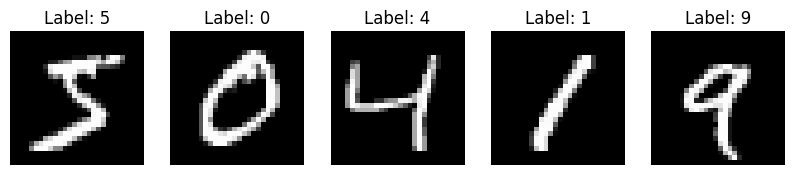

In [17]:
# Load MNIST dataset
from tensorflow.keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

# Function to plot images
def plot_images(images, labels, num_images):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(f'Label: {labels[i]}')
        plt.axis('off')
    plt.show()

# Visualize some images from the training set
num_images_to_visualize = 5
plot_images(X_train, y_train, num_images_to_visualize)

# Flatten the images for fully connected layers
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)

# Convert labels to categorical
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

It takes more than 25 minutes

Trial 5 Complete [00h 10m 26s]
val_accuracy: 0.9756388862927755

Best val_accuracy So Far: 0.9818055431048075
Total elapsed time: 00h 42m 30s
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9793 - loss: 0.0785
Test accuracy: 0.9819


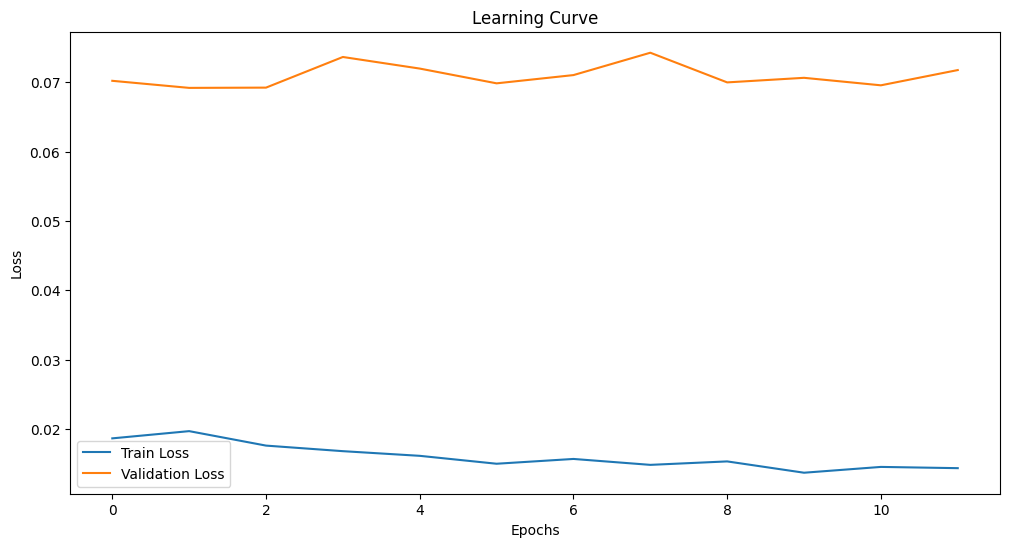

In [18]:
# You should install keras_tuner firstly
# pip install keras_tuner

# Import necessary libraries
from keras_tuner import RandomSearch
# Set seed value
set_seed(42)  



# Function to build the model
def build_model(hp):
    model = keras.Sequential()
    model.add(layers.Input(shape=(28*28,)))
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(layers.Dropout(rate=hp.Float('dropout', min_value=0.1, max_value=0.5, step=0.1)))
    model.add(layers.Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))
    
    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=hp.Choice('learning_rate', values=[1e-2, 0.1, 1e-1])),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    
    return model

# Using Keras Tuner for hyperparameter tuning
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3,
    directory='mnist_tuner',
    project_name='mnist_dnn'
)

# Early stopping callback
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, min_delta=0.001, restore_best_weights=True)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=100, validation_split=0.2, batch_size=128, callbacks=[early_stopping])

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Evaluate the model on the test set
loss, accuracy = best_model.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy:.4f}')

# Plot the learning curve of the best model
history = best_model.fit(X_train, y_train, epochs=100, validation_split=0.2, batch_size=128, callbacks=[early_stopping], verbose=0)
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Learning Curve')
plt.show()
